# 2ch toxic conversational dataset

Turning raw data consisting of toxic (!) imageboard dialogues in Russian to a dataset for finetuning ruDialoGPT-medium conversational language model.

## Setup

In [ ]:
!pip install transformers torch --quiet

In [ ]:
!sudo apt-get install p7zip-full

## Downloading raw text data


Source of raw data: https://github.com/Koziev/NLP_Datasets

In [ ]:
!rm chan*

In [ ]:
!wget https://github.com/Koziev/NLP_Datasets/raw/master/Conversations/Data/chan_dialogues.z01
!wget https://github.com/Koziev/NLP_Datasets/raw/master/Conversations/Data/chan_dialogues.z02
!wget https://github.com/Koziev/NLP_Datasets/raw/master/Conversations/Data/chan_dialogues.z03
!wget https://github.com/Koziev/NLP_Datasets/raw/master/Conversations/Data/chan_dialogues.z04
!wget https://github.com/Koziev/NLP_Datasets/raw/master/Conversations/Data/chan_dialogues.z05
!wget https://github.com/Koziev/NLP_Datasets/raw/master/Conversations/Data/chan_dialogues.zip

!7z x chan_dialogues.zip

In [ ]:
file_path = 'chan_dialogues.txt'

In [ ]:
# Print the beginning of file
with open(file_path, 'r') as file:
    for line in (file.readline() for i in range(20)): print(line)

- Себорея, витилиго, нейродермит, псориаз и прочие.

- От псориаза можно умереть? Пиздец страшно то как жить

- От всориаза - нет. От вторичной инфекции - да.







- Могу хуй отсосать. Куда подъезжать?

- на декабристов 46

- А я думал улица пушкина, дом калатушкина







- это чё за абизьяна?

- Это типичный обитатель этой помойки.







- Го

- Надо что-то придумать интересное

- Го КАЗАКИ, аутировать будем.



## Text file to DataFrame

In [ ]:
import re
import csv
import pandas as pd

In [ ]:
csv_path = 'chan_dialogues.csv'

In [ ]:
def dialogues_to_csv(file_path, csv_path):
    # Read the text file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Split the text into dialogues
    dialogues = re.split(r'\n{3,5}', text.strip())

    # Process each dialogue
    dialogue_groups = []
    for dialogue in dialogues:
        # Split the dialogue into lines and remove the dash and space from the start
        lines = [re.sub(r'^- ', '', line).strip() for line in dialogue.split('\n') if line]
        # Cap the dialogue to 5 lines
        capped_lines = lines[:5]
        dialogue_groups.append(capped_lines)

    max_lines = max(len(dialogue) for dialogue in dialogue_groups)

    # Open the CSV file for writing
    with open(csv_path, 'w', newline='', encoding='utf-8') as csvfile:
        csvwriter = csv.writer(csvfile)

        # Write the header row based on the maximum number of lines
        header = [f'{i}' for i in range(max_lines)]
        csvwriter.writerow(header)

        # Write each dialogue to the CSV file
        for dialogue in dialogue_groups:
            # Pad the dialogue lines with empty strings if they are shorter than the max length
            padded_dialogue = dialogue + [''] * (max_lines - len(dialogue))
            csvwriter.writerow(padded_dialogue)

In [ ]:
# Convert the dialogues to a CSV
dialogues_to_csv(file_path=file_path, csv_path=csv_path)

print(f'Dialogues have been saved to csv')

Dialogues have been saved to csv


In [ ]:
raw_dialogues_df = pd.read_csv(csv_path)

In [ ]:
raw_dialogues_df

,0,1,2,3,4
0,"Себорея, витилиго, нейродермит, псориаз и прочие.",От псориаза можно умереть? Пиздец страшно то к...,От всориаза - нет. От вторичной инфекции - да.,NaN,NaN
1,Могу хуй отсосать. Куда подъезжать?,на декабристов 46,"А я думал улица пушкина, дом калатушкина",NaN,NaN
2,это чё за абизьяна?,Это типичный обитатель этой помойки.,NaN,NaN,NaN
3,Го,Надо что-то придумать интересное,"Го КАЗАКИ, аутировать будем.",А еще что есть?,NaN
4,"Он зашкварен бугуртами, хули толку","Фу, нет же. Вполне добротные бампы по играм.",NaN,NaN,NaN
...,...,...,...,...,...
2932512,Уютного утречка бодрствующим уютняшкам и сладк...,И тебе уютного утречка.,Сидим с тобой вдвоём в мёртвом тредике?,Ага. А ведь еще совсем недавно тред был живой.,NaN
2932513,"С какой части нужно начать, чтобы постичь всел...",Зачем тебе это?,Чтобы быть как все.,Не нужно.,NaN
2932514,"С какой части нужно начать, чтобы постичь всел...",Утра таки всем! C 6 лучше. EoSD - там характер...,Шестая часть сложная для новичка. Пусть что-ни...,NaN,NaN
2932515,Восьмая часть - это файтинг?,Да не нужно тебе в тоху играть.,А почему?,Потому что фигня.,NaN


The DataFrame now has 2932517 dialogues of 5 or less dialogue lines.

## Cleanup with Next Sequence Prediction

Dropping incoherent dialogues using ruBert-base-cased-conversational model in NSP mode.  

If the score of the last line of a dialogue succeeding the concatenated previous lines is less than 0.8, drop this dialogue.

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
import torch
import torch.nn.functional as F
from tqdm import tqdm

In [ ]:
# Load model directly
from transformers import AutoTokenizer, BertForNextSentencePrediction

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased-conversational")
model = BertForNextSentencePrediction.from_pretrained("DeepPavlov/rubert-base-cased-conversational")

# Try to put on CUDA
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# Define batch size
batch_size = 16

In [ ]:
def make_nsp(prompts, next_sentences):
    """Return probabilities of next_sentences following prompts"""

    encoding = tokenizer(prompts, next_sentences, padding=True, return_tensors="pt")

    # Move tensors to the same device as model
    input_ids = encoding['input_ids'].to(device)
    token_type_ids = encoding['token_type_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # Forward pass on GPU if available
    with torch.no_grad():
        outputs = model(input_ids=input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)
    logits = outputs.logits

    probabilities_tensor = F.softmax(logits, dim=1)
    probabilities = probabilities_tensor.cpu().numpy()[:, 0]  # Assuming index 0 is the 'next sentence' probability

    return probabilities

In [ ]:
indices_to_drop = []

for i in tqdm(range(0, len(raw_dialogues_df), batch_size)):

    # Create batch of
    batch_df = raw_dialogues_df.iloc[i:i+batch_size]
    prompts = ['\n'.join(row.dropna().iloc[:-1]) for _, row in batch_df.iterrows()]
    next_sentences = [row.dropna().iloc[-1] for _, row in batch_df.iterrows()]

    scores = make_nsp(prompts, next_sentences)

    # Collect indices to drop
    indices_to_drop.extend(batch_df.index[scores < 0.8])

# Drop the rows after iterating
dialogues_after_NSP_df = raw_dialogues_df.drop(indices_to_drop).reset_index(drop=True)

 82%|████████▏ | 150979/183283 [1:58:14<24:21, 22.11it/s]

In [ ]:
indices_to_drop

In [ ]:
# Drop the rows after iterating
dialogues_after_NSP_df = raw_dialogues_df.drop(indices_to_drop).reset_index(drop=True)

In [ ]:
dialogues_after_NSP_df

In [ ]:
dialogues_after_NSP_df.to_csv('dialogues_after_NSP.csv', index=False)

## Deduplication

Deduplicating the dialogues by the first line (column '0').

In [ ]:
import pandas as pd

In [ ]:
dialogues_after_NSP_df = pd.read_csv("dialogues_after_NSP.csv")

In [ ]:
dialogues_after_NSP_df

,0,1,2,3,4
0,"Себорея, витилиго, нейродермит, псориаз и прочие.",От псориаза можно умереть? Пиздец страшно то к...,От всориаза - нет. От вторичной инфекции - да.,NaN,NaN
1,Могу хуй отсосать. Куда подъезжать?,на декабристов 46,"А я думал улица пушкина, дом калатушкина",NaN,NaN
2,Го,Надо что-то придумать интересное,"Го КАЗАКИ, аутировать будем.",А еще что есть?,NaN
3,Ура!,Ура!,NaN,NaN,NaN
4,Надеюсь с G&K и BNW?,есесна,NaN,NaN,NaN
...,...,...,...,...,...
1500235,Уютного утречка бодрствующим уютняшкам и сладк...,И тебе уютного утречка.,Сидим с тобой вдвоём в мёртвом тредике?,Ага. А ведь еще совсем недавно тред был живой.,NaN
1500236,"С какой части нужно начать, чтобы постичь всел...",Зачем тебе это?,Чтобы быть как все.,Не нужно.,NaN
1500237,"С какой части нужно начать, чтобы постичь всел...",Утра таки всем! C 6 лучше. EoSD - там характер...,Шестая часть сложная для новичка. Пусть что-ни...,NaN,NaN
1500238,Восьмая часть - это файтинг?,Да не нужно тебе в тоху играть.,А почему?,Потому что фигня.,NaN


In [ ]:
# Deduplicate by the first column (case-sensitive)
df_deduplicated = dialogues_after_NSP_df.drop_duplicates(subset=dialogues_after_NSP_df.columns[0], keep='first').reset_index(drop=True)

In [ ]:
df_deduplicated

,0,1,2,3,4
0,"Себорея, витилиго, нейродермит, псориаз и прочие.",От псориаза можно умереть? Пиздец страшно то к...,От всориаза - нет. От вторичной инфекции - да.,NaN,NaN
1,Могу хуй отсосать. Куда подъезжать?,на декабристов 46,"А я думал улица пушкина, дом калатушкина",NaN,NaN
2,Го,Надо что-то придумать интересное,"Го КАЗАКИ, аутировать будем.",А еще что есть?,NaN
3,Ура!,Ура!,NaN,NaN,NaN
4,Надеюсь с G&K и BNW?,есесна,NaN,NaN,NaN
...,...,...,...,...,...
971300,"Как поживаете, уютные?",Нервно.,Феназепамчику скушай.,Она поможет вылечить мой несколькодневный понос?,Не пиши мне такие ужасные вещи.
971301,Уютного утречка бодрствующим уютняшкам и сладк...,И тебе уютного утречка.,Сидим с тобой вдвоём в мёртвом тредике?,Ага. А ведь еще совсем недавно тред был живой.,NaN
971302,"С какой части нужно начать, чтобы постичь всел...",Зачем тебе это?,Чтобы быть как все.,Не нужно.,NaN
971303,Восьмая часть - это файтинг?,Да не нужно тебе в тоху играть.,А почему?,Потому что фигня.,NaN


## Distribution

Showing the current distribution by length and changing it to make it more uniform.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Function to merge columns
def merge_columns(row):
    # Drop NaN values and convert to list
    non_nan_values = row.dropna().tolist()
    # Merge all but the last value with '\n' separator
    first_col = '\n'.join(non_nan_values[:-1]) if len(non_nan_values) > 1 else non_nan_values[0]
    # The last value is kept as is
    second_col = non_nan_values[-1]
    return pd.Series([first_col, second_col])

In [ ]:
# Apply the function along the rows (axis=1)
df_merged = df_deduplicated.apply(merge_columns, axis=1)
# Rename the columns
df_merged.columns = ['input', 'output']

In [ ]:
df_merged

,input,output
0,"Себорея, витилиго, нейродермит, псориаз и проч...",От всориаза - нет. От вторичной инфекции - да.
1,Могу хуй отсосать. Куда подъезжать?\nна декабр...,"А я думал улица пушкина, дом калатушкина"
2,Го\nНадо что-то придумать интересное\nГо КАЗАК...,А еще что есть?
3,Ура!,Ура!
4,Надеюсь с G&K и BNW?,есесна
...,...,...
971300,"Как поживаете, уютные?\nНервно.\nФеназепамчику...",Не пиши мне такие ужасные вещи.
971301,Уютного утречка бодрствующим уютняшкам и сладк...,Ага. А ведь еще совсем недавно тред был живой.
971302,"С какой части нужно начать, чтобы постичь всел...",Не нужно.
971303,Восьмая часть - это файтинг?\nДа не нужно тебе...,Потому что фигня.


In [ ]:
df_merged.to_csv('dialogues_merged.csv', index=False)

### Initial distribution

In [ ]:
import math
import random

In [ ]:
df = pd.read_csv("dialogues_merged.csv")

In [ ]:
def get_distribution(df: pd.DataFrame):

    # Calculating the length of each cell in each column
    df['num_characters_input'] = df['input'].apply(lambda x: len(x))
    df['num_characters_output'] = df['output'].apply(lambda x: len(x))

    # Plot the frequencies of input
    input_char_counts = df['num_characters_input'].value_counts().sort_index()
    plt.figure()
    plt.bar(input_char_counts.index, input_char_counts.values)
    plt.xlabel('Number of Characters in Input')
    plt.ylabel('Number of Samples')
    plt.title('Frequency of Input Character Counts')
    plt.show()

    # Plot the frequencies of output..
    output_char_counts = df['num_characters_output'].value_counts().sort_index()
    plt.figure()
    plt.bar(output_char_counts.index, output_char_counts.values)
    plt.xlabel('Number of Characters in Output')
    plt.ylabel('Number of Samples')
    plt.title('Frequency of Output Character Counts')
    plt.show()

    # Calculating the average
    average_chars_input = df['num_characters_input'].mean()
    average_chars_output = df['num_characters_output'].mean()

    # Calculating the median
    median_chars_input = df['num_characters_input'].median()
    median_chars_output = df['num_characters_output'].median()

    print(f'Avg len of input: {average_chars_input:.2f}, tokens: ~ {(average_chars_input / 3.5):.2f}')
    print(f'Avg len of output: {average_chars_output:.2f}, tokens: ~ {(average_chars_output / 3.5):.2f}')

    print(f'Median len of input: {median_chars_input:.2f}, tokens: ~ {(median_chars_input / 3.5):.2f}')
    print(f'Median len of output: {median_chars_output:.2f}, tokens: ~ {(median_chars_output / 3.5):.2f}')

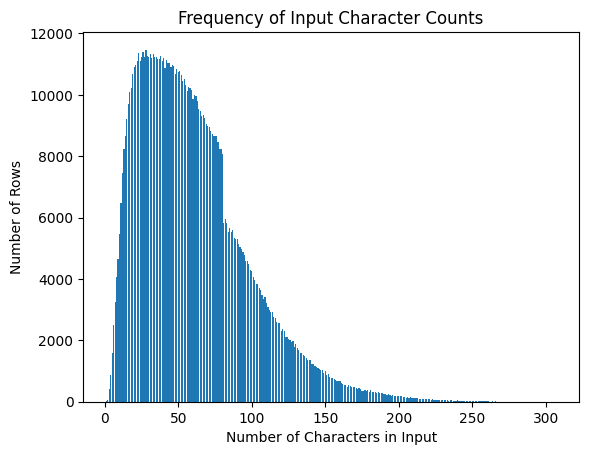

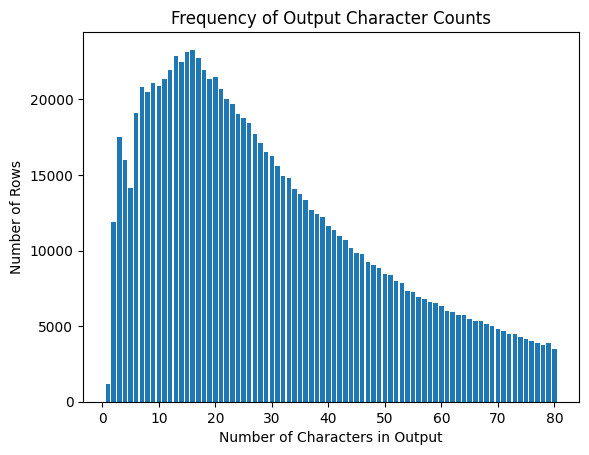

Avg len of input: 60.61, tokens: ~ 17.32
Avg len of output: 29.84, tokens: ~ 8.52
Median len of input: 54.00, tokens: ~ 15.43
Median len of output: 26.00, tokens: ~ 7.43


In [ ]:
get_distribution(df)

In [ ]:
df

,input,output,num_characters_input,num_characters_output
0,"Себорея, витилиго, нейродермит, псориаз и проч...",От всориаза - нет. От вторичной инфекции - да.,103,46
1,Могу хуй отсосать. Куда подъезжать?\nна декабр...,"А я думал улица пушкина, дом калатушкина",53,40
2,Го\nНадо что-то придумать интересное\nГо КАЗАК...,А еще что есть?,64,15
3,Ура!,Ура!,4,4
4,Надеюсь с G&K и BNW?,есесна,20,6
...,...,...,...,...
971300,"Как поживаете, уютные?\nНервно.\nФеназепамчику...",Не пиши мне такие ужасные вещи.,101,31
971301,Уютного утречка бодрствующим уютняшкам и сладк...,Ага. А ведь еще совсем недавно тред был живой.,127,46
971302,"С какой части нужно начать, чтобы постичь всел...",Не нужно.,101,9
971303,Восьмая часть - это файтинг?\nДа не нужно тебе...,Потому что фигня.,70,17


### New distribution

Cutting up to a noisy parabola. h = 60, k = 6000 and the point of 81 on the x axis are chosen arbitrarly.

In [ ]:
def print_value_counts(value_counts):
    value_counts_dict = value_counts.to_dict()

    # Sort the dictionary by values
    sorted_value_counts_dict = dict(sorted(value_counts_dict.items(), key=lambda item: item[0]))
    print(sorted_value_counts_dict)

In [ ]:
def change_distribution(value_counts):

    value_counts_dict = value_counts.to_dict()

    # Sort the dictionary by values
    sorted_value_counts_dict = dict(sorted(value_counts_dict.items(), key=lambda item: item[0]))

    h = 60
    k = 6000
    x1 = 1
    y1 = sorted_value_counts_dict[1]
    a = (y1 - k) / ((x1 - h)**2)

    # Create a new dictionary to store the parabola values
    parabola_dict = {}

    # Calculate the y values for the half-parabola
    for x in range(1, 81):
        y = a * (x - h)**2 + k
        if y < y1:  # Break if the value goes below the starting value
            break
        parabola_dict[x] = math.floor(y + (y * random.uniform(-0.05, 0.05)))  # Add random noise

    # Convert the dictionary back to a Pandas Series
    parabola_series = pd.Series(parabola_dict)

    # Replace the original values with the parabola values
    value_counts.update(parabola_series)

    return value_counts

In [ ]:
value_counts = df['num_characters_input'].value_counts()

print_value_counts(value_counts)

{1: 13, 2: 63, 3: 399, 4: 880, 5: 1602, 6: 2499, 7: 3265, 8: 4055, 9: 4638, 10: 5460, 11: 6478, 12: 7463, 13: 8248, 14: 8667, 15: 9216, 16: 9691, 17: 10107, 18: 10210, 19: 10671, 20: 10923, 21: 10963, 22: 11117, 23: 11367, 24: 11104, 25: 11228, 26: 11406, 27: 11239, 28: 11471, 29: 11281, 30: 11241, 31: 11327, 32: 11195, 33: 11330, 34: 11248, 35: 11239, 36: 11183, 37: 11171, 38: 11266, 39: 11099, 40: 11197, 41: 10860, 42: 11152, 43: 11048, 44: 11045, 45: 10911, 46: 10967, 47: 10932, 48: 10696, 49: 10830, 50: 10755, 51: 10787, 52: 10644, 53: 10447, 54: 10511, 55: 10310, 56: 10110, 57: 10242, 58: 10221, 59: 10155, 60: 9861, 61: 10010, 62: 9950, 63: 9801, 64: 9525, 65: 9487, 66: 9307, 67: 9360, 68: 9249, 69: 9061, 70: 8981, 71: 8959, 72: 8817, 73: 8737, 74: 8671, 75: 8674, 76: 8663, 77: 8465, 78: 8251, 79: 8240, 80: 8089, 81: 5828, 82: 5968, 83: 5810, 84: 5545, 85: 5669, 86: 5517, 87: 5595, 88: 5324, 89: 5310, 90: 5316, 91: 5156, 92: 5036, 93: 4965, 94: 4874, 95: 4773, 96: 4598, 97: 4590, 

In [ ]:
new_value_counts = value_counts.copy()

change_distribution(new_value_counts)

print_value_counts(new_value_counts)

{1: 12, 2: 219, 3: 393, 4: 580, 5: 790, 6: 1002, 7: 1175, 8: 1401, 9: 1487, 10: 1692, 11: 1861, 12: 2129, 13: 2293, 14: 2350, 15: 2439, 16: 2679, 17: 2885, 18: 2901, 19: 3119, 20: 3308, 21: 3345, 22: 3409, 23: 3570, 24: 3949, 25: 3799, 26: 3888, 27: 4307, 28: 4233, 29: 4464, 30: 4606, 31: 4401, 32: 4446, 33: 4732, 34: 4714, 35: 4730, 36: 4758, 37: 5183, 38: 4942, 39: 5202, 40: 5254, 41: 5401, 42: 5248, 43: 5778, 44: 5453, 45: 5871, 46: 5463, 47: 5651, 48: 6027, 49: 5900, 50: 6050, 51: 5938, 52: 5972, 53: 6087, 54: 5873, 55: 6163, 56: 5686, 57: 6117, 58: 5937, 59: 6283, 60: 6160, 61: 6005, 62: 5948, 63: 5916, 64: 5978, 65: 5748, 66: 6033, 67: 6028, 68: 5828, 69: 6131, 70: 5846, 71: 5633, 72: 5476, 73: 5853, 74: 5448, 75: 5681, 76: 5427, 77: 5250, 78: 5232, 79: 5182, 80: 5052, 81: 5828, 82: 5968, 83: 5810, 84: 5545, 85: 5669, 86: 5517, 87: 5595, 88: 5324, 89: 5310, 90: 5316, 91: 5156, 92: 5036, 93: 4965, 94: 4874, 95: 4773, 96: 4598, 97: 4590, 98: 4492, 99: 4305, 100: 4269, 101: 4060, 10

In [ ]:
dropped_df = df.copy()

for key, limit in new_value_counts.items():
    # Find the indices of rows with the current key
    indices_to_keep = dropped_df[dropped_df['num_characters_input'] == key].index[:limit]

    # Drop rows that are not within the indices_to_keep
    dropped_df.drop(dropped_df[(dropped_df['num_characters_input'] == key) & (~dropped_df.index.isin(indices_to_keep))].index, inplace=True)

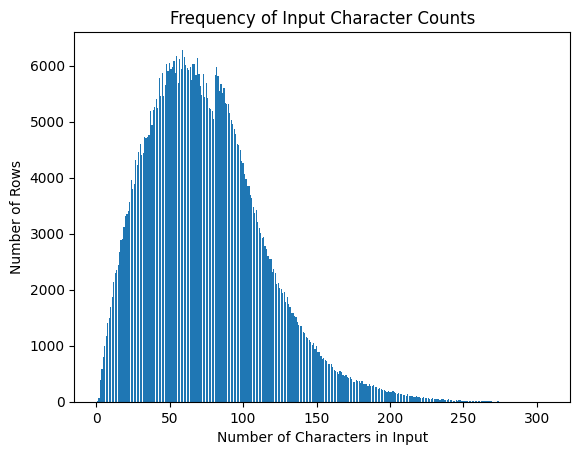

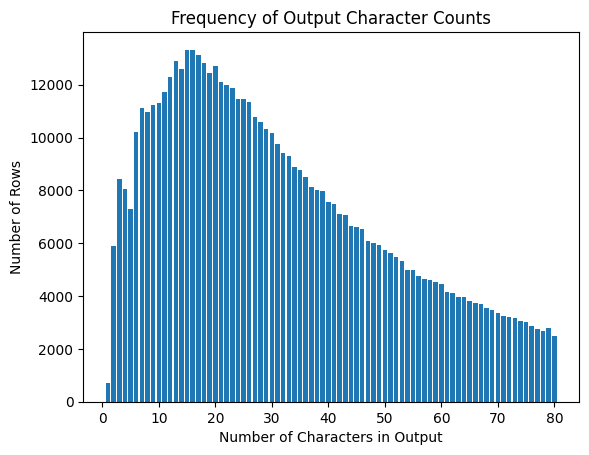

Avg len of input: 74.56, tokens: ~ 21.30
Avg len of output: 31.67, tokens: ~ 9.05
Median len of input: 70.00, tokens: ~ 20.00
Median len of output: 28.00, tokens: ~ 8.00


In [ ]:
get_distribution(dropped_df)

In [ ]:
io_df = dropped_df.reset_index(drop=True).drop(['num_characters_input', 'num_characters_output'], axis=1)

In [ ]:
io_df

,input,output
0,"Себорея, витилиго, нейродермит, псориаз и проч...",От всориаза - нет. От вторичной инфекции - да.
1,Могу хуй отсосать. Куда подъезжать?\nна декабр...,"А я думал улица пушкина, дом калатушкина"
2,Го\nНадо что-то придумать интересное\nГо КАЗАК...,А еще что есть?
3,Ура!,Ура!
4,Надеюсь с G&K и BNW?,есесна
...,...,...
592543,А сегодня не будет иммиграции в бессонную лощи...,Насколько? думаю мне стоило бы их нарубить
592544,"Как поживаете, уютные?\nНервно.\nФеназепамчику...",Не пиши мне такие ужасные вещи.
592545,Уютного утречка бодрствующим уютняшкам и сладк...,Ага. А ведь еще совсем недавно тред был живой.
592546,"С какой части нужно начать, чтобы постичь всел...",Не нужно.


In [ ]:
io_df.to_csv('io_dialogues.csv', index=False)

The dataset now has 592548 unique coherent dialogues, where *'input'* is the first part of a dialogue with lines separated by '\n' and *'output'* is the last line (to be predicted by a model).